<a href="https://colab.research.google.com/github/afifrahman04/Data_Dynasty/blob/master/Stage_2_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Stage - 2 Final Project

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from numpy import percentile
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.22.4
pandas version :  1.5.3
seaborn version :  0.12.2


In [ ]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

## Data **Cleansing**


In [ ]:
pd.set_option('display.max_columns',None)

In [ ]:
path = "/content/drive/MyDrive/Bootcamp Data Science Rakamin/Final Project/employee_attrition.csv"
df = pd.read_csv(path)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
nums = ['Age', 'DailyRate', 'DistanceFromHome', 'EmployeeCount', 'EmployeeNumber', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'StandardHours', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
cats = ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime', 'Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance']

##### A. Handle missing values


Tidak ada data yang kosong

In [ ]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

##### B. Handle duplicated data


Tidak ada data yang duplikat

In [ ]:
df.duplicated().sum()

0

##### C. Handle outliers
tidak dilakukan handling outlier karena menggunakan model yang robust terhadap outlier, outlier akan di handling di data training


##### D. Feature transformation


##### E. Feature encoding


In [ ]:
df[cats].head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,WorkLifeBalance
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes,2,2,3,2,4,3,1,0,1
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No,1,3,2,2,2,4,4,1,3
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes,2,4,2,1,3,3,2,0,3
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes,4,4,3,1,3,3,3,0,3
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No,1,1,3,1,2,3,4,1,3


In [ ]:
df['Attrition'] = df['Attrition'].replace({'No':0,'Yes':1})
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [ ]:
#Label Encoding
cat_1=['Education','EnvironmentSatisfaction','JobInvolvement','JobLevel','JobSatisfaction','Over18','PerformanceRating','RelationshipSatisfaction','StockOptionLevel','WorkLifeBalance','Gender','OverTime']
cat_cols = []
for col in cat_1:
    map_dict = {k:i for i, k in enumerate(df[col].value_counts().index,0)}
    df[col] = df[col].map(map_dict)
df[cat_1].head()

,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,Over18,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,WorkLifeBalance,Gender,OverTime
0,2,2,0,1,0,0,0,3,0,3,1,1
1,3,0,1,1,3,0,1,1,1,0,0,0
2,2,1,1,0,1,0,0,2,0,0,0,1
3,1,1,0,0,1,0,0,0,0,0,1,1
4,3,3,0,0,3,0,0,1,1,0,0,0


In [ ]:
print(df.columns)

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [ ]:
#One Hot Encoding
cat_2=['Department','BusinessTravel', 'EducationField', 'JobRole', 'MaritalStatus']
for cat in cat_2[:]:
    nominal_encoded = pd.get_dummies(df[cat], prefix=cat)
    df = pd.concat([df, nominal_encoded], axis=1)
for column in df.columns:
  if df[column].dtype == object and column != 'Attrition':
    df.drop(column, axis = 1, inplace = True)

In [ ]:
df.head(5)

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Department_Human Resources,Department_Research & Development,Department_Sales,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,1,1,2,1,94,0,1,0,5993,19479,8,0,1,11,0,3,80,0,8,0,3,6,4,0,5,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,49,0,279,8,3,1,2,0,0,61,1,1,3,5130,24907,1,0,0,23,1,1,80,1,10,3,0,10,7,1,7,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,37,1,1373,2,2,1,4,1,0,92,1,0,1,2090,2396,6,0,1,15,0,2,80,0,7,3,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
3,33,0,1392,3,1,1,5,1,1,56,0,0,1,2909,23159,1,0,1,11,0,0,80,0,8,3,0,8,7,3,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,27,0,591,2,3,1,7,3,0,40,0,0,3,3468,16632,9,0,0,12,0,1,80,1,6,3,0,2,2,2,2,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0


##### F. Handle class imbalance
TIdak dilakukan Handle class imbalance, karena akan dilakukan di data training



## Feature **Engineering**

##### A. Feature selection (membuang feature yang kurang relevan atau redundan)


In [ ]:
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Department_Human Resources,Department_Research & Development,Department_Sales,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,1,1,2,1,94,0,1,0,5993,19479,8,0,1,11,0,3,80,0,8,0,3,6,4,0,5,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,49,0,279,8,3,1,2,0,0,61,1,1,3,5130,24907,1,0,0,23,1,1,80,1,10,3,0,10,7,1,7,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,37,1,1373,2,2,1,4,1,0,92,1,0,1,2090,2396,6,0,1,15,0,2,80,0,7,3,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
3,33,0,1392,3,1,1,5,1,1,56,0,0,1,2909,23159,1,0,1,11,0,0,80,0,8,3,0,8,7,3,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,27,0,591,2,3,1,7,3,0,40,0,0,3,3468,16632,9,0,0,12,0,1,80,1,6,3,0,2,2,2,2,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [ ]:
df = df.drop(columns=['EmployeeNumber', 'EmployeeCount', 'Over18', 'StandardHours'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 50 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   Attrition                          1470 non-null   int64
 2   DailyRate                          1470 non-null   int64
 3   DistanceFromHome                   1470 non-null   int64
 4   Education                          1470 non-null   int64
 5   EnvironmentSatisfaction            1470 non-null   int64
 6   Gender                             1470 non-null   int64
 7   HourlyRate                         1470 non-null   int64
 8   JobInvolvement                     1470 non-null   int64
 9   JobLevel                           1470 non-null   int64
 10  JobSatisfaction                    1470 non-null   int64
 11  MonthlyIncome                      1470 non-null   int64
 12  MonthlyRate         

##### B. Feature extraction (membuat feature baru dari feature yang sudah ada)


### Fitur Employment Stability/Avg Years per Company

In [ ]:
df_fe = df.copy()

In [ ]:
df_fe['EmploymentStability'] = round(df_fe['TotalWorkingYears']/df_fe['NumCompaniesWorked'], 2)
df_fe[['TotalWorkingYears', 'NumCompaniesWorked', 'EmploymentStability']]

,TotalWorkingYears,NumCompaniesWorked,EmploymentStability
0,8,8,1.00
1,10,1,10.00
2,7,6,1.17
3,8,1,8.00
4,6,9,0.67
...,...,...,...
1465,17,4,4.25
1466,9,4,2.25
1467,6,1,6.00
1468,17,2,8.50


### Fitur Avg Satisfaction

In [ ]:
df_fe['AvgSatisfaction'] = round((df_fe['JobSatisfaction']+df_fe['EnvironmentSatisfaction']+df_fe['RelationshipSatisfaction'])/3, 2)
df_fe[['EnvironmentSatisfaction', 'JobSatisfaction', 'RelationshipSatisfaction', 'AvgSatisfaction']]

,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,AvgSatisfaction
0,2,0,3,1.67
1,0,3,1,1.33
2,1,1,2,1.33
3,1,1,0,0.67
4,3,3,1,2.33
...,...,...,...,...
1465,0,0,0,0.00
1466,1,2,3,2.00
1467,2,3,2,2.33
1468,1,3,1,1.67


### Fitur Income Experience Ratio

> Indented block



In [ ]:
df_fe['IncomeExperienceRatio'] = round(df_fe['MonthlyIncome']/df_fe['TotalWorkingYears'], 2)
df_fe[['MonthlyIncome', 'TotalWorkingYears', 'IncomeExperienceRatio']]

,MonthlyIncome,TotalWorkingYears,IncomeExperienceRatio
0,5993,8,749.12
1,5130,10,513.00
2,2090,7,298.57
3,2909,8,363.62
4,3468,6,578.00
...,...,...,...
1465,2571,17,151.24
1466,9991,9,1110.11
1467,6142,6,1023.67
1468,5390,17,317.06


### Fitur Income Distance Ratio

In [ ]:
df_fe['IncomeDistanceRatio'] = round(df_fe['MonthlyIncome']/df_fe['DistanceFromHome'], 2)
df_fe[['MonthlyIncome', 'DistanceFromHome', 'IncomeDistanceRatio']]

,MonthlyIncome,DistanceFromHome,IncomeDistanceRatio
0,5993,1,5993.00
1,5130,8,641.25
2,2090,2,1045.00
3,2909,3,969.67
4,3468,2,1734.00
...,...,...,...
1465,2571,23,111.78
1466,9991,6,1665.17
1467,6142,4,1535.50
1468,5390,2,2695.00


### Fitur Years in Previous Roles

In [ ]:
df_fe['YearsInPreviousRoles'] = df_fe['YearsAtCompany'] - df_fe['YearsInCurrentRole']
df_fe[['YearsAtCompany', 'YearsInCurrentRole', 'YearsInPreviousRoles']]

,YearsAtCompany,YearsInCurrentRole,YearsInPreviousRoles
0,6,4,2
1,10,7,3
2,0,0,0
3,8,7,1
4,2,2,0
...,...,...,...
1465,5,2,3
1466,7,7,0
1467,6,2,4
1468,9,6,3


##### C. Tuliskan minimal 4 feature tambahan
Feature apa yang bisa meng improve model, domain knowled, tidak harus dipakai
Menambahkan di luar data set
1. Sallary
2. Punya kendaraan atau tidak
3. Tanggungan (Anak)
4.

## Mempersiapkan **Data Training dan Data Testing**
menentukan feature mana saja yang akan digunakan


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.model_selection import cross_validate
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform

In [ ]:
nums_clean = ['Age', 'DailyRate', 'DistanceFromHome','HourlyRate', 'MonthlyIncome', 'MonthlyRate',
              'NumCompaniesWorked', 'PercentSalaryHike','TotalWorkingYears', 'TrainingTimesLastYear',
              'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 50 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   Attrition                          1470 non-null   int64
 2   DailyRate                          1470 non-null   int64
 3   DistanceFromHome                   1470 non-null   int64
 4   Education                          1470 non-null   int64
 5   EnvironmentSatisfaction            1470 non-null   int64
 6   Gender                             1470 non-null   int64
 7   HourlyRate                         1470 non-null   int64
 8   JobInvolvement                     1470 non-null   int64
 9   JobLevel                           1470 non-null   int64
 10  JobSatisfaction                    1470 non-null   int64
 11  MonthlyIncome                      1470 non-null   int64
 12  MonthlyRate         

##### Split Data Training dan Data Testing

In [ ]:
df_sp = df.copy()

In [ ]:
X = df_sp.drop(['Attrition'],axis=1,inplace=False)
y = df_sp['Attrition']

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
data_train = pd.concat([Xtrain, ytrain], axis=1)
data_test  = pd.concat([Xtest, ytest], axis=1)

##### Handle Outlier
Handlie outlier untuk data training, untuk data continous (numerik)

In [ ]:
data_sqrt = data_train.copy()

In [ ]:
for var in nums_clean:
    data_sqrt[var]= (data_sqrt[var]).apply(np.sqrt)

data_sqrt.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Department_Human Resources,Department_Research & Development,Department_Sales,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Attrition
1097,2.213364,4.325308,2.140695,2,0,0,7.549834,1,0,2,47.916594,100.179838,0.000000,0,3.741657,0,2,3,1.414214,1.732051,0,1.000000,1.000000,0.0,0.000000,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0
727,2.059767,4.115954,1.495349,2,2,0,8.544004,0,0,0,32.419130,116.159373,1.000000,0,3.872983,0,1,0,0.000000,1.414214,0,0.000000,0.000000,0.0,0.000000,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
254,2.320596,5.942465,2.114743,2,1,0,6.708204,0,1,0,83.252628,103.595367,1.414214,0,3.741657,0,1,1,3.162278,1.414214,0,1.732051,1.414214,0.0,1.414214,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
1175,2.498999,4.709679,1.861210,0,1,0,8.124038,0,1,3,72.766751,87.709749,2.000000,0,4.582576,1,0,0,2.645751,1.732051,0,2.236068,2.000000,1.0,0.000000,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
1341,2.359611,4.199428,2.114743,0,2,0,9.433981,0,1,1,64.784257,136.469777,1.000000,0,3.316625,0,3,1,3.162278,1.414214,0,3.162278,2.828427,0.0,1.414214,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0


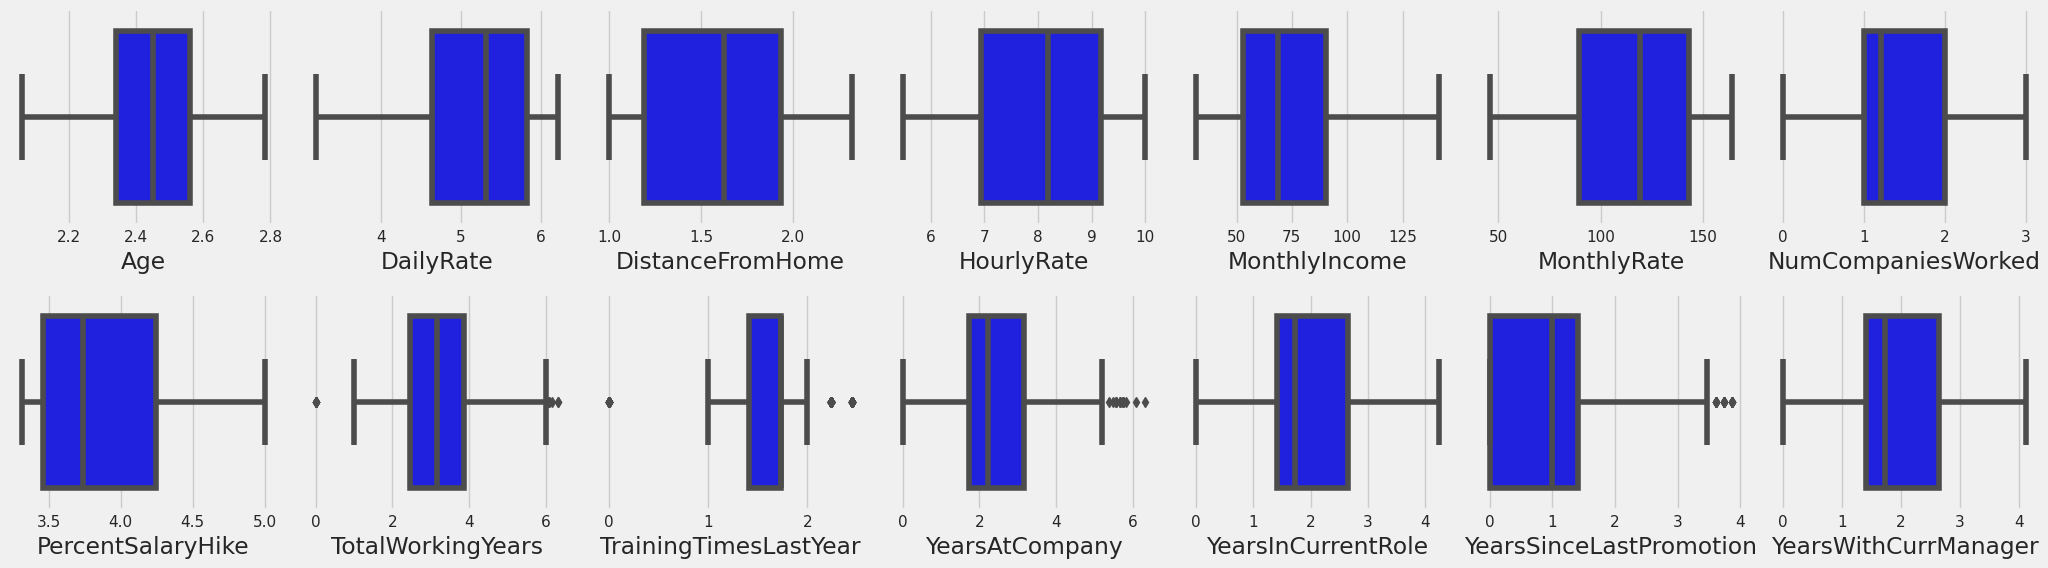

In [ ]:
#Individual Displot
for i in range (0, len(nums_clean)):
  plt.subplot(3,7,i+1)
  sns.boxplot(x=data_sqrt[nums_clean[i]],color='blue')
  plt.xlabel(nums_clean[i])
  plt.tight_layout()

##### Scaling data training

In [ ]:
data_scal = data_sqrt.copy()

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 5))
HR_col = list(data_scal.columns)
for col in HR_col:
    data_scal[col] = data_scal[col].astype(float)
    data_scal[[col]] = scaler.fit_transform(data_scal[[col]])
data_scal.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Department_Human Resources,Department_Research & Development,Department_Sales,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Attrition
1097,1.061644,1.886318,4.318866,2.5,0.000000,0.0,2.291302,1.666667,0.00,3.333333,0.736497,2.295150,0.000000,0.0,1.262442,0.0,3.333333,5.000000,1.118034,3.535534,0.0,0.790569,1.178511,0.000000,0.000000,0.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0
727,0.000000,1.542122,1.875475,2.5,3.333333,0.0,3.390373,0.000000,0.00,0.000000,0.029838,2.969087,1.666667,0.0,1.652509,0.0,1.666667,0.000000,0.000000,2.886751,0.0,0.000000,0.000000,0.000000,0.000000,0.0,5.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,5.0,0.0
254,1.802820,4.545062,4.220605,2.5,1.666667,0.0,1.360866,0.000000,1.25,0.000000,2.347762,2.439200,2.357023,0.0,1.262442,0.0,1.666667,1.666667,2.500000,2.886751,0.0,1.369306,1.666667,0.000000,1.714986,0.0,0.0,5.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0
1175,3.035928,2.518257,3.260686,0.0,1.666667,0.0,2.926094,0.000000,1.25,5.000000,1.869624,1.769223,3.333333,0.0,3.760157,5.0,0.000000,0.000000,2.091650,3.535534,0.0,1.767767,2.357023,1.290994,0.000000,0.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0
1341,2.072490,1.679360,4.220605,0.0,3.333333,0.0,4.374257,0.000000,1.25,1.666667,1.505635,3.825680,1.666667,0.0,0.000000,0.0,5.000000,1.666667,2.500000,2.886751,0.0,2.500000,3.333333,0.000000,1.714986,0.0,5.0,0.0,0.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0


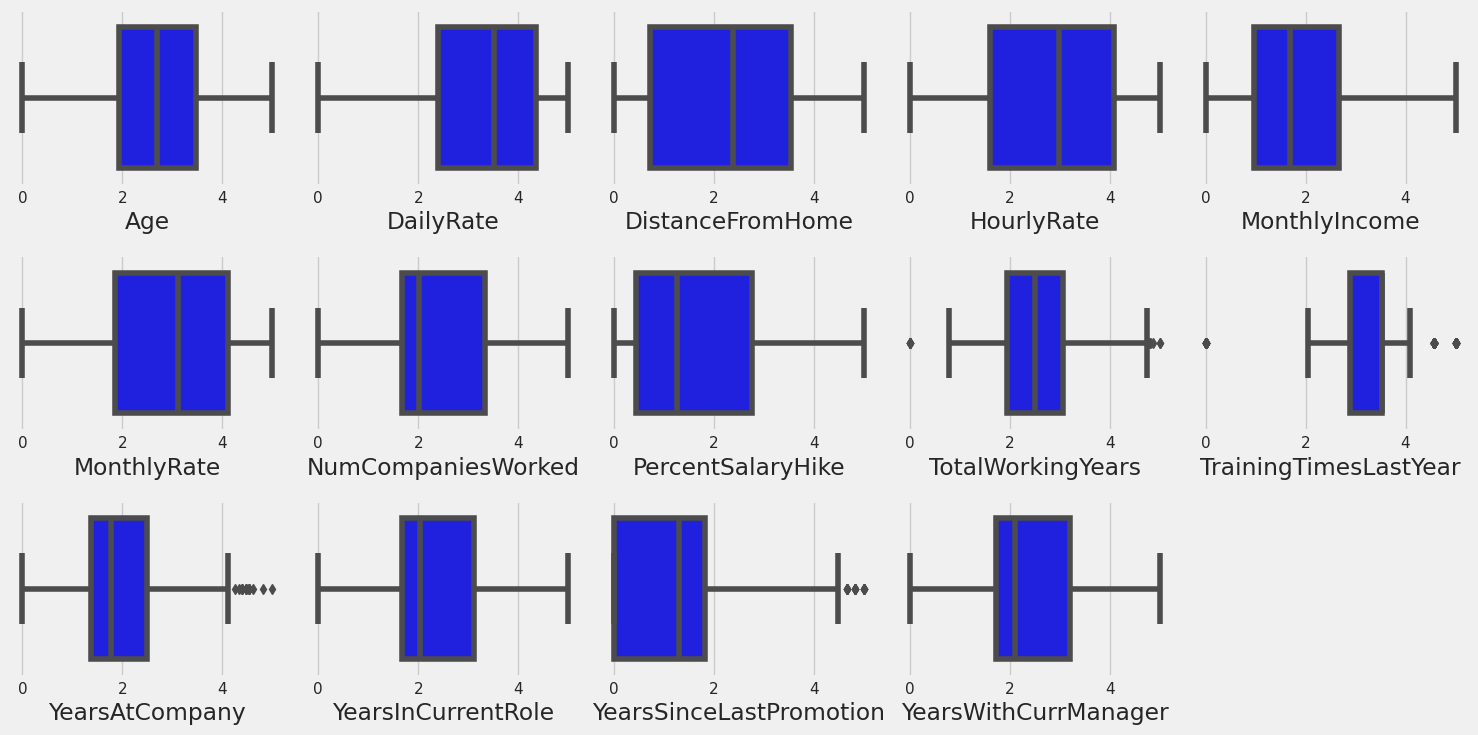

In [ ]:
plt.figure(figsize=(15, 12))
#Individual Displot
for i in range (0, len(nums_clean)):
  plt.subplot(5,5,i+1)
  sns.boxplot(x=data_scal[nums_clean[i]],color='blue')
  plt.xlabel(nums_clean[i])
  plt.tight_layout()

In [ ]:
data_scal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1176 entries, 1097 to 1126
Data columns (total 50 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                1176 non-null   float64
 1   DailyRate                          1176 non-null   float64
 2   DistanceFromHome                   1176 non-null   float64
 3   Education                          1176 non-null   float64
 4   EnvironmentSatisfaction            1176 non-null   float64
 5   Gender                             1176 non-null   float64
 6   HourlyRate                         1176 non-null   float64
 7   JobInvolvement                     1176 non-null   float64
 8   JobLevel                           1176 non-null   float64
 9   JobSatisfaction                    1176 non-null   float64
 10  MonthlyIncome                      1176 non-null   float64
 11  MonthlyRate                        1176 non-null   fl

In [ ]:
data_scal['Attrition'].value_counts()


0.0    978
5.0    198
Name: Attrition, dtype: int64

######  Class imbalance data training

In [ ]:
data_class = data_scal.copy()

In [ ]:
# pemisahan features vs target
X = data_class.drop(['Attrition'],axis=1,inplace=False)
y = data_class['Attrition']
print(X.shape)
print(y.shape)

(1176, 49)
(1176,)


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy=1)
X_over_SMOTE, y_over_SMOTE = smote.fit_resample(X, y)

y_over_SMOTE = y_over_SMOTE.replace({0.0: 'No', 5.0: 'Yes'})

print('SMOTE')
print(pd.Series(y_over_SMOTE).value_counts())

SMOTE
No     978
Yes    978
Name: Attrition, dtype: int64


## Fit Model